Họ và tên : Bùi Minh Tú

MSSV: 19146295

Lớp AI sáng thứ 4

BT: Nhận dạng 10 món ăn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.models import Sequential

In [ ]:
def loadData():
    file = open('/content/drive/MyDrive/AI/BT-CNN/food.data', 'rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [ ]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(3000, 128, 128, 3)
(3000, 10)


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=50, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/50
38/38 [==============================] - 14s 357ms/step - loss: 4.7272 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.0900
Epoch 2/50
38/38 [==============================] - 13s 342ms/step - loss: 2.3031 - accuracy: 0.0971 - val_loss: 2.3037 - val_accuracy: 0.0900
Epoch 3/50
38/38 [==============================] - 13s 343ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3040 - val_accuracy: 0.0883
Epoch 4/50
38/38 [==============================] - 13s 345ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3041 - val_accuracy: 0.0900
Epoch 5/50
38/38 [==============================] - 13s 345ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3041 - val_accuracy: 0.0900
Epoch 6/50
38/38 [==============================] - 13s 344ms/step - loss: 2.3028 - accuracy: 0.0917 - val_loss: 2.3043 - val_accuracy: 0.0900
Epoch 7/50
38/38 [==============================] - 13s 344ms/step - loss: 2.3027 - accuracy: 0.0904 - val_loss: 2.3039 - val_accuracy: 0.0783

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 314.3497
Test accuracy 0.5233


In [ ]:
model.save('Final.h5')

In [ ]:
from keras.models import load_model
model5=load_model('Final.h5')

In [ ]:
class_name = ['Bánh mì','Bánh xèo','Bún chả','Chả lụa','Cháo lòng','Cơm tấm','Gỏi cuốn','Hủ tiếu','Nem chua','Phở']

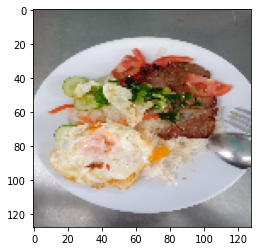

In [ ]:
img = load_img('/content/cơm tấm.jpg',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)

In [ ]:
img=img.reshape(1,128,128,3)
class_name[np.argmax(model5.predict(img),axis=1)[0]]

'Cơm tấm'